In [50]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
import shap
import rfpimp
from joblib import Parallel, delayed
from sklearn.model_selection import ParameterGrid

# from parfit.fit import *
# from parfit.score import *
# from parfit.plot import *
# from parfit.crossval import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [5]:
path = 'data/deep_odds/'

In [6]:
! ls {path}

bookkeeper-data                         database.sqlite
data-final                              database.sqlitedatabase.sqlite
data-final.csv                          features_with_na
data-final.csv.zip                      match_data
data-final.zip                          match_data_final_without_team_stats.csv
data_final_form                         match_data_new
data_final_form.zip                     player_data


In [7]:
data_final = pd.read_pickle(path+'data_final_form')

In [8]:
#code for formation creation
# data_final.head()

# data_final.isnull().sum()

# data_final.columns[:100]

# x = np.array(data_final.loc[100, ['away_player_X2',
#        'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6',
#        'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10',
#        'away_player_X11']])

# y = np.array(data_final.loc[100, ['away_player_Y2',
#        'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6',
#        'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
#        'away_player_Y11']])

# plt.scatter(x,y)


# for i in range(1,12): 
#     data_final.apply(lambda x: (x[f'home_player_X{i}',f'home_player_Y{i}']))

# l = []

# for i in range(1,12):
#     x = f'away_player_X{i}'
#     y = f'away_player_Y{i}'
#     l.extend(list(zip(data_final[x],data_final[y])))

# pos2idx = {j:i for i,j in enumerate(set(l))}

# len(pos2idx)

# pos2idx

# data_final.apply(lambda x: (x.loc[:,'home_player_X1'],x.loc[:,'home_player_Y1']),axis=0)

# pd.Series(list(zip(data_final.home_player_X1,data_final.home_player_Y1))).map(pos2idx)

# for i in range(1,12):
#     data_final[f'home_player_{i}_pos'] = pd.Series(list(zip(data_final[f'home_player_X{i}'],data_final[f'home_player_Y{i}']))).map(pos2idx)

# for i in range(1,12):
#     data_final[f'away_player_{i}_pos'] = pd.Series(list(zip(data_final[f'away_player_X{i}'],data_final[f'away_player_Y{i}']))).map(pos2idx)

# data_final.head()

# data_final.columns[-22:]

# data_final.shape

# list(np.sort(data_final.loc[:,['home_player_1_pos', 'home_player_2_pos', 'home_player_3_pos',
#        'home_player_4_pos', 'home_player_5_pos', 'home_player_6_pos',
#        'home_player_7_pos', 'home_player_8_pos', 'home_player_9_pos',
#        'home_player_10_pos', 'home_player_11_pos']].values,axis=1))

# df = pd.DataFrame(np.sort(data_final.loc[:,['home_player_1_pos', 'home_player_2_pos', 'home_player_3_pos',
#        'home_player_4_pos', 'home_player_5_pos', 'home_player_6_pos',
#        'home_player_7_pos', 'home_player_8_pos', 'home_player_9_pos',
#        'home_player_10_pos', 'home_player_11_pos']].values,axis=1),columns = ['home_player_1_pos', 'home_player_2_pos', 'home_player_3_pos',
#        'home_player_4_pos', 'home_player_5_pos', 'home_player_6_pos',
#        'home_player_7_pos', 'home_player_8_pos', 'home_player_9_pos',
#        'home_player_10_pos', 'home_player_11_pos'])

# df1 = pd.DataFrame(np.sort(data_final.loc[:,['away_player_1_pos', 'away_player_2_pos', 'away_player_3_pos',
#        'away_player_4_pos', 'away_player_5_pos', 'away_player_6_pos',
#        'away_player_7_pos', 'away_player_8_pos', 'away_player_9_pos',
#        'away_player_10_pos', 'away_player_11_pos']].values,axis=1),columns = ['away_player_1_pos', 'away_player_2_pos', 'away_player_3_pos',
#        'away_player_4_pos', 'away_player_5_pos', 'away_player_6_pos',
#        'away_player_7_pos', 'away_player_8_pos', 'away_player_9_pos',
#        'away_player_10_pos', 'away_player_11_pos'])

# df1

# df['home_formation'] = df.apply(
#     lambda x: '%s_%s_%s_%s_%s_%s_%s_%s_%s_%s_%s' % (x['home_player_1_pos'], x['home_player_2_pos'], 
#                                                     x['home_player_3_pos'], x['home_player_4_pos'], 
#                                                     x['home_player_5_pos'], x['home_player_6_pos'],
#                                                    x['home_player_7_pos'], x['home_player_8_pos'],
#                                                    x['home_player_9_pos'], x['home_player_10_pos'],
#                                                    x['home_player_11_pos']),
#     axis=1)

# df

# df1['home_formation'] = df1.apply(
#     lambda x: '%s_%s_%s_%s_%s_%s_%s_%s_%s_%s_%s' % (x['away_player_1_pos'], x['away_player_2_pos'], 
#                                                     x['away_player_3_pos'], x['away_player_4_pos'], 
#                                                     x['away_player_5_pos'], x['away_player_6_pos'],
#                                                    x['away_player_7_pos'], x['away_player_8_pos'],
#                                                    x['away_player_9_pos'], x['away_player_10_pos'],
#                                                    x['away_player_11_pos']),
#     axis=1)

# df.home_formation

# set(pd.concat((df.home_formation,df1.home_formation),axis=0))

# df['away_formation'] = df1.apply(
#     lambda x: '%s_%s_%s_%s_%s_%s_%s_%s_%s_%s_%s' % (x['away_player_1_pos'], x['away_player_2_pos'], 
#                                                     x['away_player_3_pos'], x['away_player_4_pos'], 
#                                                     x['away_player_5_pos'], x['away_player_6_pos'],
#                                                    x['away_player_7_pos'], x['away_player_8_pos'],
#                                                    x['away_player_9_pos'], x['away_player_10_pos'],
#                                                    x['away_player_11_pos']),
#     axis=1)

# set(df.away_formation).difference(set(df.home_formation))

# df1['home_formation'].map(form2idx)

# form2idx = {j:f'formation_{i}' for i,j in enumerate(set(pd.concat((df.home_formation,df1.home_formation),axis=0)))}

# form_df = pd.DataFrame()
# form_df['home_form'] =df['home_formation'].map(form2idx)
# form_df['away_form'] = df1['home_formation'].map(form2idx)

# form_df.shape

# data_final = pd.concat((data_final,form_df),axis=1)

# data_final.drop(['home_player_X1', 'home_player_X2',
#        'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
#        'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
#        'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
#        'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
#        'away_player_X8', 'away_player_X9', 'away_player_X10',
#        'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
#        'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
#        'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
#        'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
#        'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
#        'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
#        'away_player_Y11'],axis = 1,inplace = True)

# data_final.to_pickle('data/deep_odds/data_final_form')

# data_final.shape

# np.unique(np.sort(np.array([[1,2,3],[4,50,6],[4,50,6]]),axis=1),axis=0)

# {j:i for i,j in enumerate(list(np.unique(np.sort(data_final.loc[:,['home_player_1_pos', 'home_player_2_pos', 'home_player_3_pos',
#        'home_player_4_pos', 'home_player_5_pos', 'home_player_6_pos',
#        'home_player_7_pos', 'home_player_8_pos', 'home_player_9_pos',
#        'home_player_10_pos', 'home_player_11_pos']].values,axis=1),axis=0)))}

# for e in zip(data_final.loc[:,'home_player_X1'],data_final.loc[:,'home_player_Y1']): print(e)



# data_final.apply(lambda x: (x.loc[:,'home_player_X1'],x.loc[:,'home_player_Y1']))

# data_final.groupby(['away_player_X1','away_player_X2',
#        'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6',
#        'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10',
#        'away_player_X11']).count().reset_index()

In [9]:
# repetetive column
data_final.drop('league_id_y', axis=1, inplace=True)

In [10]:
data_final.drop(['id','country_id','home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11'],axis = 1, inplace = True)

In [11]:
data_final.drop(['home_player_1_pos', 'home_player_2_pos', 'home_player_3_pos',
       'home_player_4_pos', 'home_player_5_pos', 'home_player_6_pos',
       'home_player_7_pos', 'home_player_8_pos', 'home_player_9_pos',
       'home_player_10_pos', 'home_player_11_pos', 'away_player_1_pos',
       'away_player_2_pos', 'away_player_3_pos', 'away_player_4_pos',
       'away_player_5_pos', 'away_player_6_pos', 'away_player_7_pos',
       'away_player_8_pos', 'away_player_9_pos', 'away_player_10_pos',
       'away_player_11_pos'],axis=1,inplace = True)

In [16]:
data_final.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession'],axis=1, inplace = True)

In [20]:
data_final.dropna(how='any',inplace=True)

In [22]:
bookkeeper_data = pd.read_feather(path + 'bookkeeper-data')

In [23]:
bookkeeper_data[:2]

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,match_api_id
0,1.29,5.5,11.0,1.30,4.75,8.25,1.3,4.4,8.5,1.25,4.5,10.0,NaN,NaN,NaN,1.25,4.5,10.0,1.25,5.0,10.0,1.28,5.5,12.0,1.30,4.75,10.0,1.29,4.5,11.0,489042
1,1.20,6.5,15.0,1.22,5.50,10.00,1.2,5.2,11.0,1.20,5.0,11.0,NaN,NaN,NaN,1.17,5.5,12.0,1.20,5.5,12.0,1.25,6.0,13.0,1.22,5.50,13.0,1.22,5.0,13.0,489043


In [24]:
bookkeeper_data.shape

(8045, 31)

* Training : upto last-2 seasons of each league
* Validation : 2nd last season
* Test: last season

In [11]:
# data is only for 3 leagues
data_final.league_id_x.unique()

array([ 1729,  7809, 21518], dtype=uint64)

In [25]:
# adding year column
data_final['year'] = data_final.date.dt.year

In [27]:
league_years = data_final[['league_id_x','year']].drop_duplicates().reset_index(drop=True)

In [28]:
league_years

,league_id_x,year
0,1729,2010
1,1729,2011
2,1729,2012
3,1729,2013
4,1729,2014
5,1729,2015
6,1729,2016
7,7809,2010
8,7809,2011
9,7809,2012


In [29]:
# validation set
val_yr_lg = league_years.groupby('league_id_x').tail(2).groupby(
    'league_id_x').head(1)
val_yr_lg

,league_id_x,year
5,1729,2015
12,7809,2015
19,21518,2015


In [30]:
# test set
test_yr_lg = league_years.groupby('league_id_x').tail(1)
test_yr_lg

,league_id_x,year
6,1729,2016
13,7809,2016
20,21518,2016


### More features and null treatment

In [31]:
data_final['month'] = data_final.date.dt.month
data_final['dow'] = data_final.date.dt.dayofweek
data_final['hour '] = data_final.date.dt.hour

In [32]:
def convert_cats(train, col_not_convert=[], test=None):
    """
    Convert columns in a training and test dataframe
    into category codes 
    
    train: Training dataframe
    col_not_convert: list of columns which are string type and which you don't want to convert
    test: Test/ Validation set (Mapping from category codes from training)
    """

    for n, c in train.items():
        if is_string_dtype(c) and n not in col_not_convert:
            train[n] = c.astype('category').cat.as_ordered()

    if test is not None:
        for n, c in test.items():
            if (n in train.columns) and (train[n].dtype.name == 'category'):
                test[n] = pd.Categorical(
                    c, categories=train[n].cat.categories, ordered=True)

    cols = list(train.columns[train.dtypes == 'category'])
    for c in cols:
        train[c] = train[c].astype('category').cat.codes
        if test is not None: test[c] = test[c].astype('category').cat.codes

In [33]:
# convert string to cats

convert_cats(data_final)

In [34]:
# removing nulls from int/float based columns, replace with -1 as this is what we did for string type also

data_final.fillna(-1, inplace=True)

In [35]:
data_final[:2]

,league_id_x,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1_overall_rating,home_player_1_potential,home_player_1_preferred_foot,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_2_overall_rating,home_player_2_potential,home_player_2_preferred_foot,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_gk_diving,home_player_2_gk_handling,home_player_2_gk_kicking,home_player_2_gk_positioning,home_player_2_gk_reflexes,home_player_3_overall_rating,home_player_3_potential,home_player_3_preferred_foot,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_player_3_balance,home_player_3_shot_power,home_player_3_jumping,home_player_3_stamina,home_player_3_strength,home_player_3_long_shots,home_player_3_aggression,home_player_3_interceptions,home_player_3_positioning,home_player_3_vision,home_player_3_penalties,home_player_3_marking,home_player_3_standing_tackle,home_player_3_sliding_tackle,home_player_3_gk_diving,home_player_3_gk_handling,home_player_3_gk_kicking,home_player_3_gk_positioning,home_player_3_gk_reflexes,home_player_4_overall_rating,home_player_4_potential,home_player_4_preferred_foot,home_player_4_attacking_work_rate,home_player_4_defensive_work_rate,home_player_4_crossing,home_player_4_finishing,home_player_4_heading_accuracy,home_player_4_short_passing,home_player_4_volleys,home_player_4_dribbling,home_player_4_curve,home_player_4_free_kick_accuracy,home_player_4_long_passing,home_player_4_ball_control,home_player_4_acceleration,home_player_4_sprint_speed,home_player_4_agility,home_player_4_reactions,home_player_4_balance,home_player_4_shot_power,home_player_4_jumping,home_player_4_stamina,home_player_4_strength,home_player_4_long_shots,home_player_4_aggression,home_player_4_interceptions,home_player_4_positioning,home_player_4_vision,home_player_4_penalties,home_player_4_marking,home_player_4_standing_tackle,home_player_4_sliding_tackle,home_player_4_gk_diving,home_player_4_gk_handling,home_player_4_gk_kicking,home_player_4_g

In [36]:
# don't need id and date column

data_final.drop(['date'], axis=1, inplace=True)

In [38]:
data_final.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

Making lineup of home and way players

In [24]:
# data_final['away_lineup'] = data_final[['away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
#        'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
#        'away_player_X9', 'away_player_X10', 'away_player_X11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
#        'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
#        'away_player_Y9', 'away_player_Y10', 'away_player_Y11']].astype(str).add('_').sum(axis=1).str[:-1]

In [25]:
# data_final['home_lineup'] = data_final[['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
#        'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
#        'home_player_X9', 'home_player_X10', 'home_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
#        'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
#        'home_player_Y9', 'home_player_Y10', 'home_player_Y11']].astype(str).add('_').sum(axis=1).str[:-1]

In [39]:
data_final.shape

(6560, 895)

In [40]:
id_cols_to_rem = list(data_final.filter(regex='id$').columns) + list(data_final.filter(regex='\d$').columns)

In [41]:
id_cols_to_rem

['match_api_id', 'home_team_api_id', 'away_team_api_id']

In [42]:
data_final.drop(id_cols_to_rem, axis=1, inplace=True)

In [43]:
# new cols were string
convert_cats(data_final)

### Splitting data into train, validation and test 

In [45]:
train = data_final[(data_final.year != 2016) & (data_final.year != 2015) &
                   (data_final.year != 2014)]
val1 = data_final[data_final.year == 2014]
train_val1 = data_final[(data_final.year != 2016) & (data_final.year != 2015)]
val2 = data_final[data_final.year == 2015]

# completely hold out
test = data_final[data_final.year == 2016]

In [46]:
train.shape, val1.shape, train_val1.shape, val2.shape, test.shape

((3938, 892), (1038, 892), (4976, 892), (1051, 892), (533, 892))

In [47]:
x_train, y_train = train.drop('outcome', axis=1), train['outcome']
x_val1, y_val1 = val1.drop('outcome', axis=1), val1['outcome']
x_val2, y_val2 = val2.drop('outcome', axis=1), val2['outcome']

### Random Forest

Multiclass without callibration

In [48]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=200, random_state=10)
m.fit(train_val1.drop('outcome', axis=1), train_val1['outcome'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [51]:
m_probs = m.predict_proba(val2.drop('outcome', axis=1))
score = log_loss(val2['outcome'], m_probs)
score

1.0077618242724922

In [52]:
m_probs[:10]

array([[0.28 , 0.305, 0.415],
       [0.425, 0.33 , 0.245],
       [0.16 , 0.26 , 0.58 ],
       [0.095, 0.12 , 0.785],
       [0.315, 0.225, 0.46 ],
       [0.235, 0.315, 0.45 ],
       [0.465, 0.25 , 0.285],
       [0.4  , 0.33 , 0.27 ],
       [0.555, 0.28 , 0.165],
       [0.25 , 0.29 , 0.46 ]])

In [53]:
m.score(val2.drop('outcome', axis=1), val2['outcome'])

0.5014272121788773

Multiclass with callibration 

In [54]:
m2 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=10)
m2.fit(train.drop('outcome', axis=1), train['outcome'])
m2_probs = m2.predict_proba(val1.drop('outcome', axis=1))

sig_m2 = CalibratedClassifierCV(m2, method="sigmoid", cv="prefit")
sig_m2.fit(val1.drop('outcome', axis=1),
           val1['outcome'])  # final callibrated model
sig_m2_probs = sig_m2.predict_proba(val2.drop('outcome', axis=1))
sig_score = log_loss(val2['outcome'], sig_m2_probs)

print('logloss : ', sig_score)

logloss :  1.000009719575398


In [55]:
sig_m2.score(x_val2, y_val2)

0.5033301617507137

#### Hyperparameter tuning

In [57]:
def fitOne(model, x_train, y_train, x_val1, y_val1, params):

    model.set_params(**params)
    m = model.fit(x_train, y_train)

    sig_mod = CalibratedClassifierCV(m, method="sigmoid", cv="prefit")
    return sig_mod.fit(x_val1, y_val1)


def fitModels(model,
              paramGrid,
              x_train,
              y_train,
              x_val1,
              y_val1,
              n_jobs=-1,
              verbose=10):

    return Parallel(
        n_jobs=n_jobs, verbose=verbose)(
            delayed(fitOne)(model, x_train, y_train, x_val1, y_val1, params)
            for params in paramGrid)


def scoreOne(model, x, y, metric):
    probs = model.predict_proba(x)
    return log_loss(y, probs)


def scoreModels(models,
                X,
                y,
                metric=log_loss,
                predict_proba=True,
                n_jobs=-1,
                verbose=10):

    return Parallel(
        n_jobs=n_jobs, verbose=np.ceil(verbose / 10))(
            delayed(scoreOne)(m, X, y, metric) for m in models)


def getBestModel(models, scores, greater_is_better=False):

    if greater_is_better:
        return models[np.argmax(scores)]
    else:
        return models[np.argmin(scores)]


def getBestScore(scores, greater_is_better=False):

    if greater_is_better:
        return np.max(scores)
    else:
        return np.min(scores)


def bestFit(model,
            paramGrid,
            x_train,
            y_train,
            x_val1,
            y_val1,
            x_val2,
            y_val2,
            metric=log_loss,
            greater_is_better=False,
            predict_proba=True,
            scoreLabel=None,
            vrange=None,
            cmap='YlOrRd',
            n_jobs=-1,
            verbose=10):
    print('-------------FITTING MODELS-------------')
    models = fitModels(model, paramGrid, x_train, y_train, x_val1, y_val1,
                       n_jobs, verbose)
    print('-------------SCORING MODELS-------------')
    scores = scoreModels(models, x_val2, y_val2, metric, predict_proba, n_jobs,
                         verbose)

    return getBestModel(models, scores, greater_is_better), getBestScore(
        scores, greater_is_better), models, scores

In [58]:
grid = {
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [100],
    'n_jobs': [-1],
    'random_state': [10]
}
paramGrid = ParameterGrid(grid)

In [59]:
best_model, best_score, all_models, all_scores = bestFit(RandomForestClassifier(), paramGrid,
                                                    x_train, y_train, x_val1, y_val1, x_val2, y_val2,
                                                    metric=roc_auc_score, greater_is_better=False, 
                                                    scoreLabel='log_loss')

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.3min remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.7min remaining:   20.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.3s finished


In [60]:
best_score

0.9896570297571913

In [61]:
best_model

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
            cv='prefit', method='sigmoid')

In [63]:
best_model.score(x_val2, y_val2)

0.5099904852521409

#### Feature importance

In [64]:
imp = rfpimp.importances(best_model, x_val2 , y_val2) # permutation

In [69]:
imp

,Importance
Feature,
home_player_4_overall_rating,-0.005709
away_player_6_strength,-0.004757
home_player_10_volleys,-0.004757
away_player_2_overall_rating,-0.004757
home_player_10_finishing,-0.004757
home_player_4_crossing,-0.004757
home_player_7_short_passing,-0.003806
home_player_10_curve,-0.003806
home_player_5_sliding_tackle,-0.003806


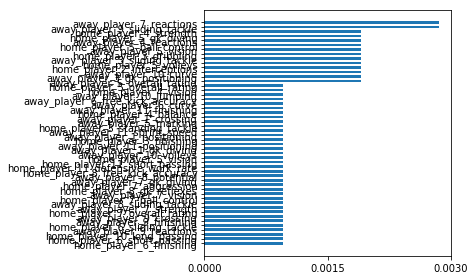

In [68]:
rfpimp.plot_importances(imp[-50:])

In [90]:
imp2 = rfpimp.importances(m, x_val2 , y_val2) # permutation

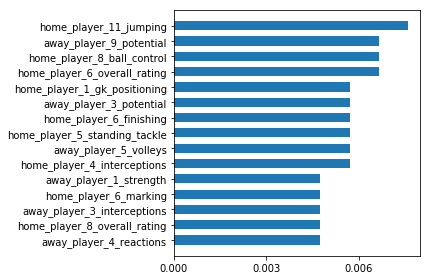

In [91]:
rfpimp.plot_importances(imp2[-15:])

## End